<a href="https://colab.research.google.com/github/JameyNguyen/DS-FinalProject/blob/main/DS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SAVE THE PLAYERS!**

The following project analyzes player's likelihood of injury based on the position they play in european football. The question that is asked is **"Which soccer game statistics correlate the most with the number of injuries that occur per match?”**

The following data is extracted from this link: https://github.com/pkardjian/soccer_injury_risk_prediction/blob/main/data/cleaned_data.csv.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Import the data
df = pd.read_csv('https://raw.githubusercontent.com/pkardjian/soccer_injury_risk_prediction/main/data/cleaned_data.csv')
df.head()



,Unnamed: 0,age,games,games_starts,minutes,cards_yellow,cards_red,minutes_90s,goals,shots,...,ball_recoveries,aerials_won,aerials_lost,n_injuries,n_severe_injuries,currently_injured,position_DF,position_FW,position_GK,position_MF
0,0,29.273973,14.0,14.0,1260.0,0.0,0.0,14.0,0.0,0.0,...,19.0,3.0,0.0,6,0,0,0,0,1,0
1,1,25.534247,12.0,9.0,873.0,0.0,0.0,9.7,0.0,5.0,...,41.0,26.0,13.0,4,0,0,1,0,0,0
2,2,28.498630,4.0,3.0,286.0,0.0,0.0,3.2,0.0,7.0,...,11.0,11.0,4.0,14,4,0,1,0,0,0
3,3,28.495890,9.0,8.0,731.0,1.0,0.0,8.1,0.0,5.0,...,37.0,10.0,6.0,15,1,0,1,0,0,0
4,4,27.767123,8.0,7.0,571.0,0.0,0.0,6.3,0.0,3.0,...,24.0,13.0,10.0,10,1,0,1,0,0,0


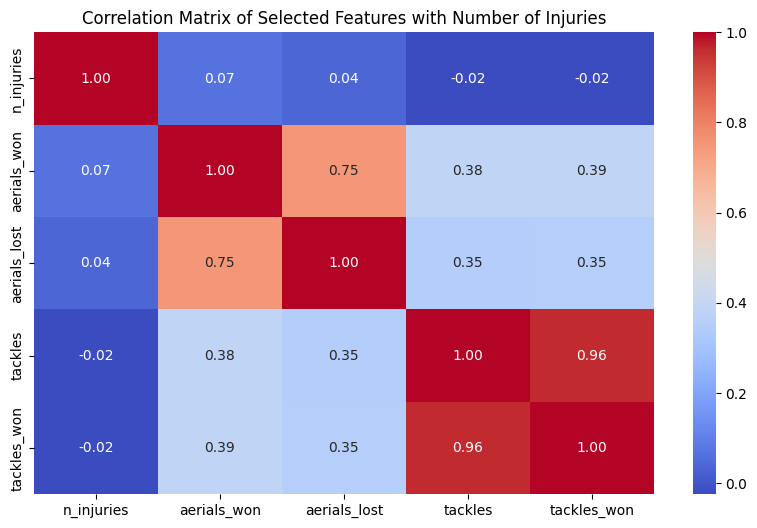

In [ ]:
selected_columns = ['n_injuries', 'aerials_won', 'aerials_lost', 'tackles', 'tackles_won']
df_selected = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features with Number of Injuries')
plt.show()

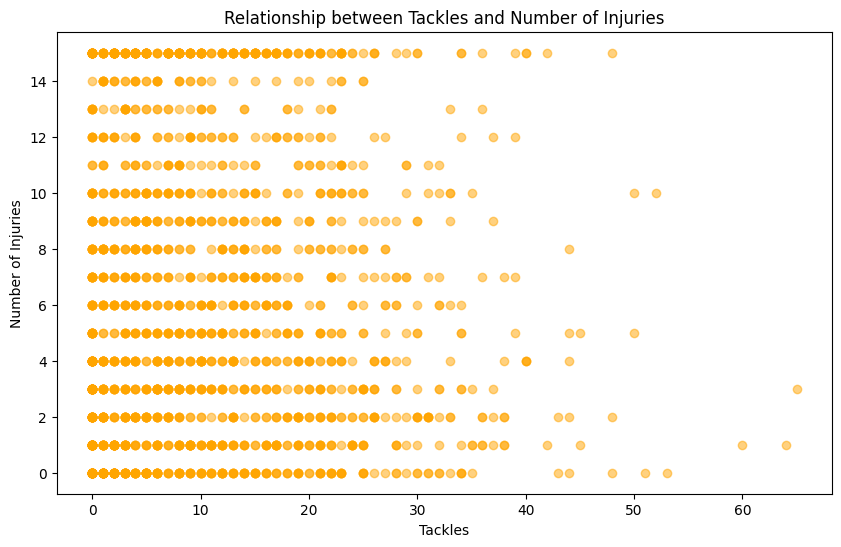

In [ ]:
# Scatter plot to explore the relationship between tackles and number of injuries
plt.figure(figsize=(10, 6))
plt.scatter(df['tackles'], df['n_injuries'], alpha=0.5, color='orange')
plt.title('Relationship between Tackles and Number of Injuries')
plt.xlabel('Tackles')
plt.ylabel('Number of Injuries')
plt.show()

**Learning about the Data in the DataSet**

In [ ]:
#Learning about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1902 non-null   int64  
 1   age                          1902 non-null   float64
 2   games                        1902 non-null   float64
 3   games_starts                 1902 non-null   float64
 4   minutes                      1902 non-null   float64
 5   cards_yellow                 1902 non-null   float64
 6   cards_red                    1902 non-null   float64
 7   minutes_90s                  1902 non-null   float64
 8   goals                        1902 non-null   float64
 9   shots                        1902 non-null   float64
 10  shots_free_kicks             1902 non-null   float64
 11  passes_completed             1902 non-null   float64
 12  passes                       1902 non-null   float64
 13  passes_total_dista

In [ ]:
df.describe()

,Unnamed: 0,age,games,games_starts,minutes,cards_yellow,cards_red,minutes_90s,goals,shots,...,ball_recoveries,aerials_won,aerials_lost,n_injuries,n_severe_injuries,currently_injured,position_DF,position_FW,position_GK,position_MF
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.00000,1902.000000,1902.000000,...,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,964.931651,26.887233,9.856467,7.167718,641.288644,1.380652,0.077813,7.12592,0.887487,7.985279,...,34.165089,8.620400,8.493691,6.264984,0.719769,0.050999,0.412723,0.327024,0.065720,0.441115
std,554.955156,4.248937,4.233941,4.897771,405.684169,1.440821,0.286909,4.50772,1.685399,9.108776,...,26.920130,9.884816,8.595272,5.092229,1.002269,0.220053,0.492453,0.469250,0.247858,0.496651
min,0.000000,16.923288,1.000000,0.000000,5.000000,0.000000,0.000000,0.10000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,485.250000,23.737671,7.000000,3.000000,273.750000,0.000000,0.000000,3.02500,0.000000,1.000000,...,12.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,967.500000,26.509589,11.000000,7.000000,630.000000,1.000000,0.000000,7.00000,0.000000,5.000000,...,28.000000,5.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1445.750000,29.917123,14.000000,12.000000,994.750000,2.000000,0.000000,11.07500,1.000000,11.000000,...,52.000000,12.000000,12.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1923.000000,41.347945,15.000000,15.000000,1350.000000,7.000000,2.000000,15.00000,18.000000,58.000000,...,153.000000,75.000000,69.000000,15.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Cleaning the data**

In [ ]:
#Cleaning the Data

df_clean = df.dropna()
df_clean = df_clean.drop_duplicates()

df_clean.head()

# Define position columns
position_columns = ['position_DF', 'position_FW', 'position_GK', 'position_MF']

# Function to identify all positions for each player
def assign_positions(row):
    positions = []
    if row['position_DF'] == 1:
        positions.append("DF")
    if row['position_FW'] == 1:
        positions.append("FW")
    if row['position_GK'] == 1:
        positions.append("GK")
    if row['position_MF'] == 1:
        positions.append("MF")
    return ", ".join(positions)

# Create new 'player_position' column
df_clean['player_position'] = df_clean.apply(assign_positions, axis=1)

# Drop the original position columns
df_clean = df_clean.drop(columns=position_columns)

# Convert currently_injured column to boolean
df_clean['currently_injured'] = df['currently_injured'].apply(lambda x: True if x == 1 else False)

df_clean = df_clean.drop(columns=['Unnamed: 0'])

**Exploring the Data**

In [ ]:
#Descriptive Analysis
df_clean.describe()

,age,games,games_starts,minutes,cards_yellow,cards_red,minutes_90s,goals,shots,shots_free_kicks,...,miscontrols,dispossessed,passes_received,fouls,fouled,ball_recoveries,aerials_won,aerials_lost,n_injuries,n_severe_injuries
count,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.00000,1902.000000,1902.000000,1902.000000,...,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,26.887233,9.856467,7.167718,641.288644,1.380652,0.077813,7.12592,0.887487,7.985279,0.269190,...,9.574658,5.739222,244.936909,7.711356,7.352787,34.165089,8.620400,8.493691,6.264984,0.719769
std,4.248937,4.233941,4.897771,405.684169,1.440821,0.286909,4.50772,1.685399,9.108776,0.924326,...,9.529569,6.565442,186.320077,6.415252,7.294521,26.920130,9.884816,8.595272,5.092229,1.002269
min,16.923288,1.000000,0.000000,5.000000,0.000000,0.000000,0.10000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.737671,7.000000,3.000000,273.750000,0.000000,0.000000,3.02500,0.000000,1.000000,0.000000,...,2.000000,1.000000,91.000000,2.000000,2.000000,12.000000,2.000000,2.000000,2.000000,0.000000
50%,26.509589,11.000000,7.000000,630.000000,1.000000,0.000000,7.00000,0.000000,5.000000,0.000000,...,7.000000,4.000000,213.500000,7.000000,5.000000,28.000000,5.000000,6.000000,5.000000,0.000000
75%,29.917123,14.000000,12.000000,994.750000,2.000000,0.000000,11.07500,1.000000,11.000000,0.000000,...,14.000000,8.000000,358.000000,12.000000,11.000000,52.000000,12.000000,12.000000,10.000000,1.000000
max,41.347945,15.000000,15.000000,1350.000000,7.000000,2.000000,15.00000,18.000000,58.000000,10.000000,...,60.000000,52.000000,1070.000000,37.000000,46.000000,153.000000,75.000000,69.000000,15.000000,6.000000


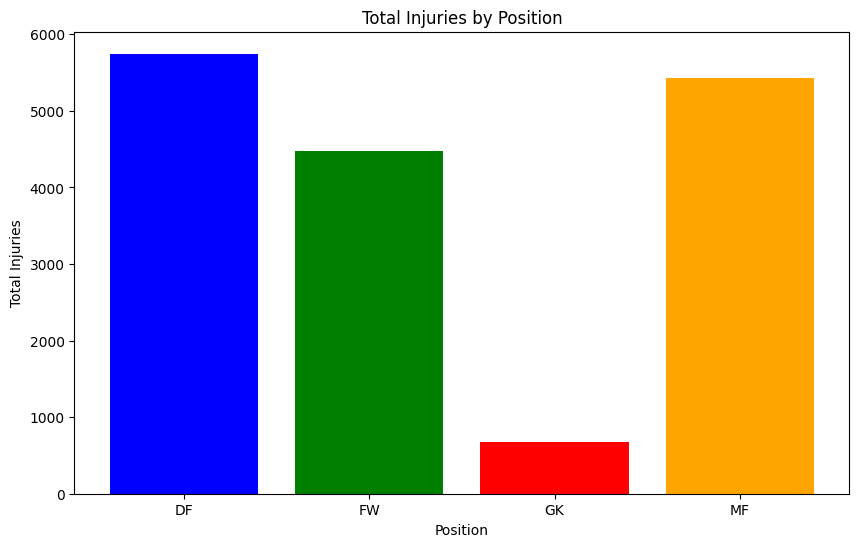

In [ ]:
#Graph for Injury By Position:

positions = ['position_DF', 'position_FW', 'position_GK', 'position_MF']
df['total_injuries'] = df['n_injuries'] + df['n_severe_injuries']

#Dictionary to list the amount of injuries by position
injuries_by_position = {
    'DF': df[df['position_DF'] == 1]['total_injuries'].sum(),
    'FW': df[df['position_FW'] == 1]['total_injuries'].sum(),
    'GK': df[df['position_GK'] == 1]['total_injuries'].sum(),
    'MF': df[df['position_MF'] == 1]['total_injuries'].sum()
}

# Plotting the bar chart
positions = list(injuries_by_position.keys())
injuries = list(injuries_by_position.values())

plt.figure(figsize=(10, 6))
plt.bar(positions, injuries, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Position')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Position')
plt.show()

<ipython-input-10-619e93ca6a91>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injuries_by_age_group = df.groupby('age_group')['currently_injured'].sum()


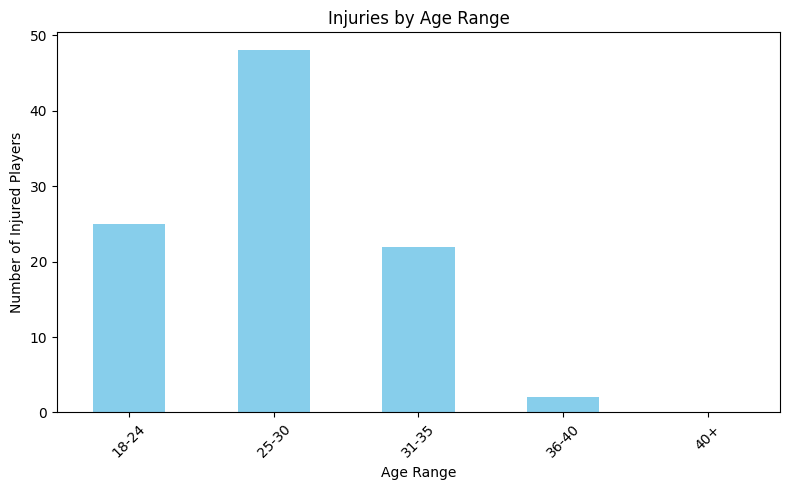

In [ ]:
#Injury by age range
bins = [18, 24, 30, 35, 40, 100]
labels = ['18-24', '25-30', '31-35', '36-40', '40+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count the number of currently injured players in each age group
injuries_by_age_group = df.groupby('age_group')['currently_injured'].sum()

# Plotting the bar chart
plt.figure(figsize=(8, 5))
injuries_by_age_group.plot(kind='bar', color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Number of Injured Players')
plt.title('Injuries by Age Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


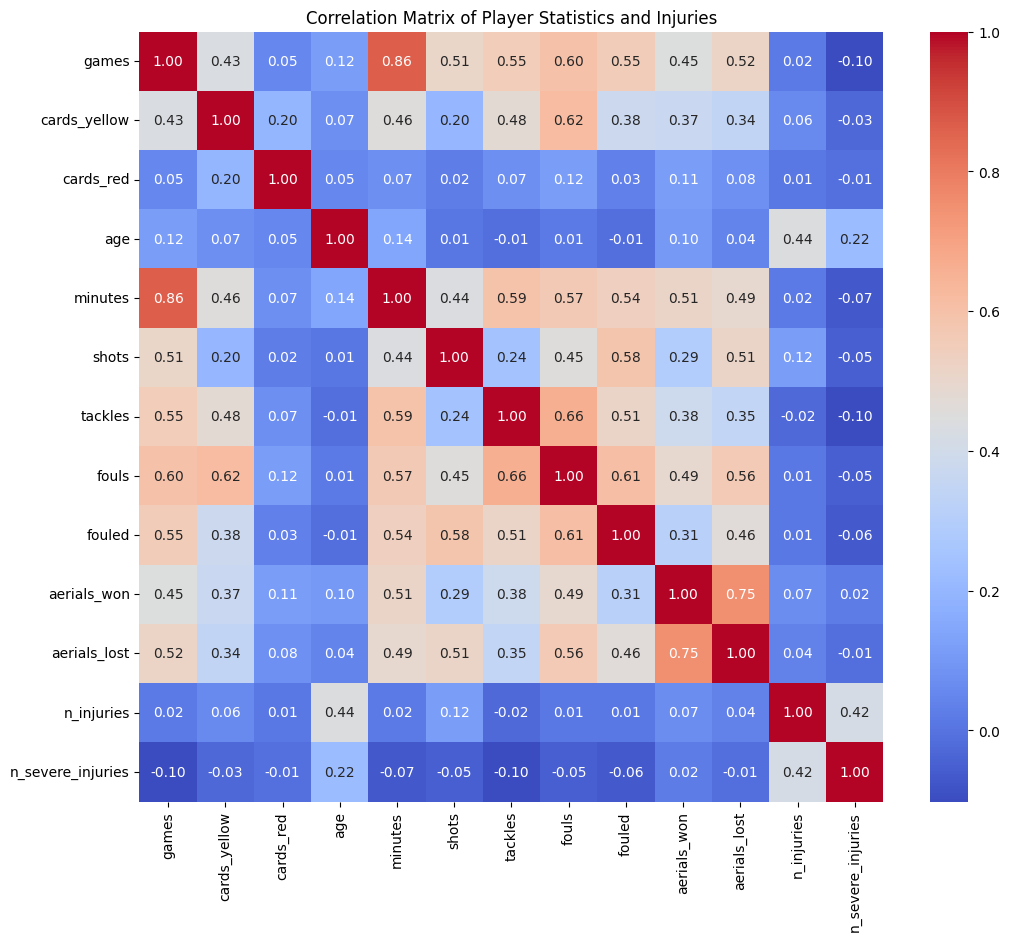

In [ ]:
# prompt: create a correlation graph between the columns games, age, minutes, shots, passes, tackles, dribbles, fouls, aerials_won, aerials_lost, n_injuries, n_severe_injuries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clean is your cleaned DataFrame from the previous code

# Select the columns for correlation analysis
columns_for_correlation = ['games', 'cards_yellow', 'cards_red', 'age', 'minutes', 'shots', 'tackles', 'fouls', 'fouled', 'aerials_won', 'aerials_lost', 'n_injuries', 'n_severe_injuries']
correlation_data = df_clean[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Player Statistics and Injuries')
plt.show()

<ipython-input-12-9b6d40fe1620>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('tackles_group')['total_injuries'].sum()


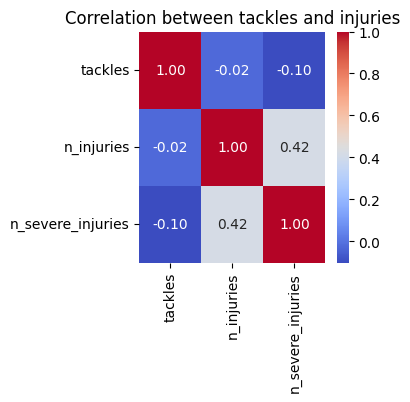

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# analyze the impact of tackles on injuries;
bins = [0, 5, 10, 15, 20, 25, 30]

df_clean['tackles_group'] = pd.cut(df_clean['tackles'], bins=bins, labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30'])

df_clean['total_injuries'] = df_clean['n_injuries'] + df_clean['n_severe_injuries']
df_clean.groupby('tackles_group')['total_injuries'].sum()

# df_clean.groupby('tackles_group')['total_injuries'].sum().plot(kind='bar')
# plt.figure(figsize=(10, 6))

#make correlation coefficient between tackles, n_injuries, and n_severe_injuries
df_tackles = df_clean[['tackles', 'n_injuries', 'n_severe_injuries']]
t = df_tackles.corr()

plt.figure(figsize=(3, 3))
sns.heatmap(t, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between tackles and injuries")
plt.show()

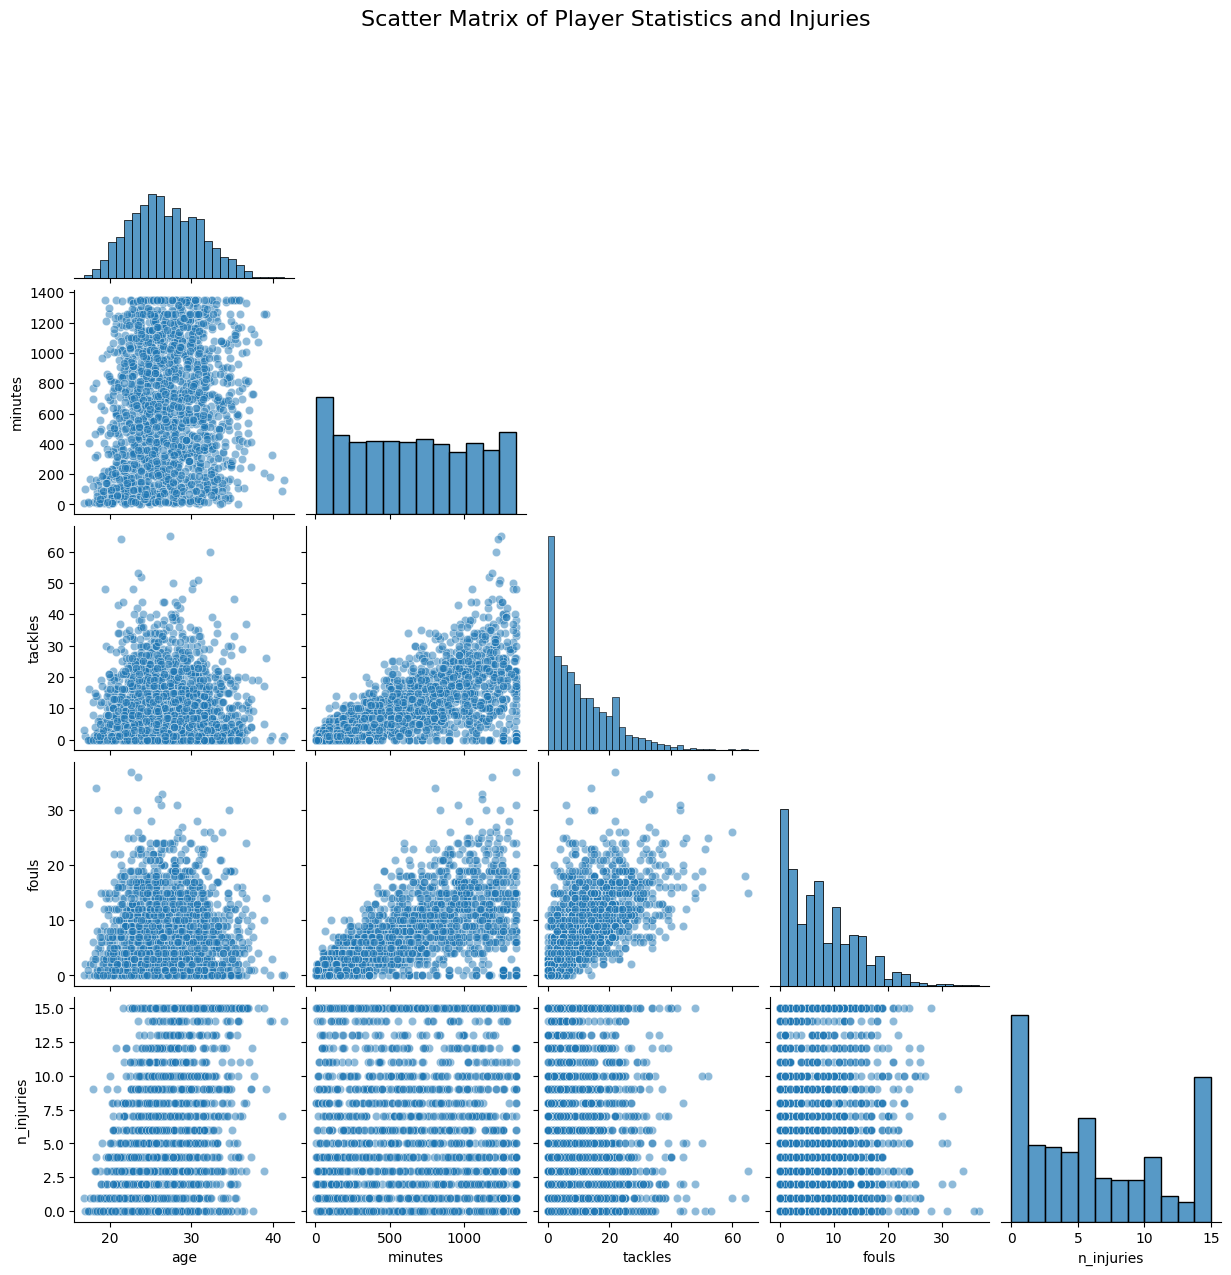

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_clean is your cleaned DataFrame

# Select the columns for correlation analysis
reduced_columns = ['age', 'minutes', 'tackles', 'fouls', 'n_injuries']

# Create a pair plot
sns.pairplot(df_clean[reduced_columns], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Scatter Matrix of Player Statistics and Injuries", y=1.02, fontsize=16)
plt.show()


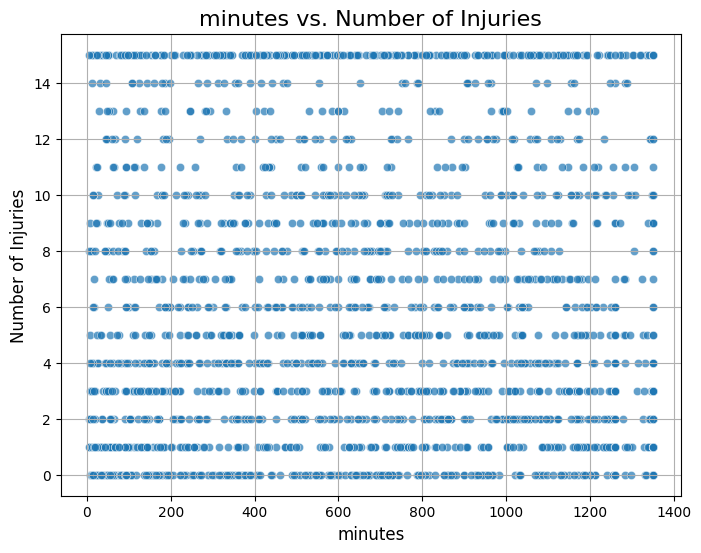

In [ ]:
# Scatter plot: age vs. number of injuries
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='minutes', y='n_injuries', alpha=0.7)
plt.title('minutes vs. Number of Injuries', fontsize=16)
plt.xlabel('minutes', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.grid(True)
plt.show()


<ipython-input-15-a8ae80d54394>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  minutesPerAgeGroup = df_clean.groupby('age_group')['minutes_90s'].mean()


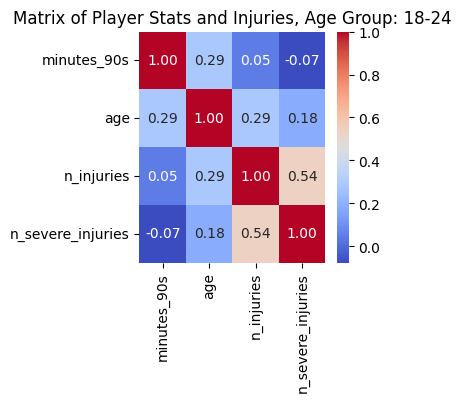

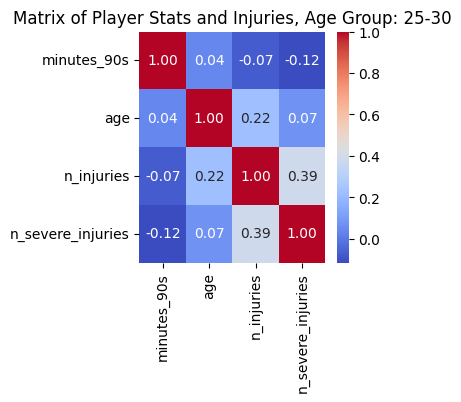

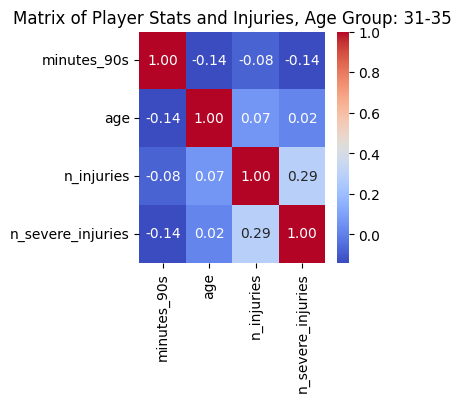

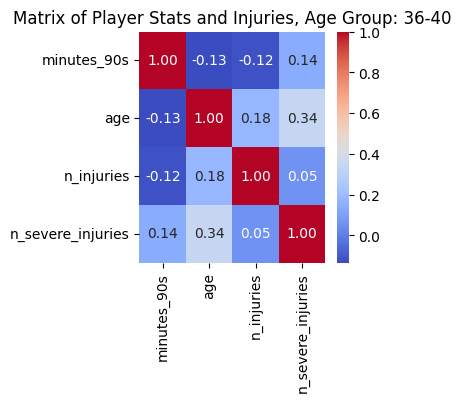

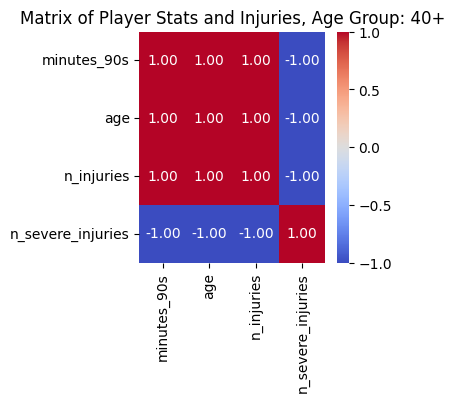

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Do older players who have to play longer on average during matches get injured more?

bins = [18, 24, 30, 35, 40, 100]
labels = ['18-24', '25-30', '31-35', '36-40', '40+']

df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

minutesPerAgeGroup = df_clean.groupby('age_group')['minutes_90s'].mean()
# minutesPerAgeGroup.plot(kind='bar')

for group in minutesPerAgeGroup.index:
    #print a correlation matrix for each group with their minutes_90s, age, n_injuries, and n_severe_injuries
    correlation_data = df_clean[df_clean['age_group'] == group][['minutes_90s', 'age', 'n_injuries', 'n_severe_injuries']]

    # Calculate the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Create the correlation heatmap
    plt.figure(figsize=(3, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Matrix of Player Stats and Injuries, Age Group: {group}")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

# Model the data. We used Logistic Regression as our primary model
# Feature selection
X = df_clean.drop(columns=['currently_injured', 'player_position', "age_group", "tackles_group"])
y = df_clean['n_injuries']

# Scale the data to process better
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets into 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model_log = LogisticRegression(random_state=42, max_iter=1000)
model_log.fit(X_train, y_train)

# Evaluate on the test set
y_pred = model_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

# Cross-validation
cv_scores = cross_val_score(model_log, X_train, y_train, cv=5)
formatted_scores = [f"{score:.4f}" for score in cv_scores]
print(f"Cross-Validation Scores: {', '.join(formatted_scores)}")
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")


Accuracy on the test set: 0.5827
Cross-Validation Scores: 0.5016, 0.4868, 0.5296, 0.4605, 0.5000
Cross-Validation Accuracy: 0.49572260569456433


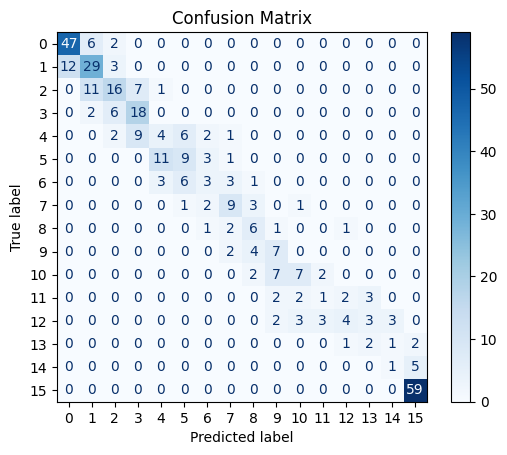

Classification Accuracy: 0.5827
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        55
           1       0.60      0.66      0.63        44
           2       0.55      0.46      0.50        35
           3       0.53      0.69      0.60        26
           4       0.21      0.17      0.19        24
           5       0.41      0.38      0.39        24
           6       0.27      0.19      0.22        16
           7       0.50      0.56      0.53        16
           8       0.38      0.55      0.44        11
           9       0.37      0.54      0.44        13
          10       0.54      0.39      0.45        18
          11       0.17      0.10      0.12        10
          12       0.50      0.22      0.31        18
          13       0.25      0.33      0.29         6
          14       0.20      0.17      0.18         6
          15       0.89      1.00      0.94        59

    accuracy            

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_log.classes_)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Confusion Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")

#Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


In [ ]:
#Feature engineering


#OneHot-encoding
potential_new_features = ['age_group', 'tackles_group', 'player_position']
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Loop through potential new features for one-hot encoding and add one feature at a time
for feature in potential_new_features:

    one_hot_encoded = encoder.fit_transform(df_clean[[feature]])
    one_hot_feature_names = encoder.get_feature_names_out([feature])


    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_feature_names, index=df_clean.index)

    X_new = pd.concat([X, one_hot_df], axis=1)


    X_new_scaled = scaler.fit_transform(X_new)

    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y, test_size=0.2, random_state=42)
    model_log_new = LogisticRegression(random_state=42, max_iter=1000)
    model_log_new.fit(X_train_new, y_train_new)

    y_pred_new = model_log_new.predict(X_test_new)
    accuracy_new = accuracy_score(y_test_new, y_pred_new)

    print(f"Feature Added: {feature}")
    print(f"Accuracy with {feature}: {accuracy_new:.4f}")

    # Cross-validation
    cv_scores_new = cross_val_score(model_log_new, X_train_new, y_train_new, cv=5)
    print(f"Cross-Validation Accuracy with {feature}: {cv_scores_new.mean():.4f}\n")






Feature Added: age_group
Accuracy with age_group: 0.5669
Cross-Validation Accuracy with age_group: 0.4944

Feature Added: tackles_group
Accuracy with tackles_group: 0.5958
Cross-Validation Accuracy with tackles_group: 0.4760

Feature Added: player_position
Accuracy with player_position: 0.5564
Cross-Validation Accuracy with player_position: 0.4819



In [ ]:
#More feature engineering to find stats that effect accuracy

potential_new_features = df_clean.drop(columns=['currently_injured', 'n_injuries']).columns.tolist()

# Loop through potential new features for one-hot encoding and add one feature at a time
for feature in potential_new_features:

    one_hot_encoded = encoder.fit_transform(df_clean[[feature]])
    one_hot_feature_names = encoder.get_feature_names_out([feature])


    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_feature_names, index=df_clean.index)

    X_new = pd.concat([X, one_hot_df], axis=1)


    X_new_scaled = scaler.fit_transform(X_new)

    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y, test_size=0.2, random_state=42)
    model_log_new = LogisticRegression(random_state=42, max_iter=1000)
    model_log_new.fit(X_train_new, y_train_new)

    y_pred_new = model_log_new.predict(X_test_new)
    accuracy_new = accuracy_score(y_test_new, y_pred_new)

    print(f"Feature Added: {feature}")
    print(f"Accuracy with {feature}: {accuracy_new:.4f}")

    # Cross-validation
    cv_scores_new = cross_val_score(model_log_new, X_train_new, y_train_new, cv=5)
    print(f"Cross-Validation Accuracy with {feature}: {cv_scores_new.mean():.4f}\n")






Feature Added: age
Accuracy with age: 0.3123
Cross-Validation Accuracy with age: 0.2373

Feature Added: games
Accuracy with games: 0.5722
Cross-Validation Accuracy with games: 0.4813

Feature Added: games_starts
Accuracy with games_starts: 0.5591
Cross-Validation Accuracy with games_starts: 0.4635

Feature Added: minutes
Accuracy with minutes: 0.3202
Cross-Validation Accuracy with minutes: 0.2741

Feature Added: cards_yellow
Accuracy with cards_yellow: 0.5669
Cross-Validation Accuracy with cards_yellow: 0.4813

Feature Added: cards_red
Accuracy with cards_red: 0.5774
Cross-Validation Accuracy with cards_red: 0.4951

Feature Added: minutes_90s
Accuracy with minutes_90s: 0.4383
Cross-Validation Accuracy with minutes_90s: 0.3346

Feature Added: goals
Accuracy with goals: 0.5564
Cross-Validation Accuracy with goals: 0.4819

Feature Added: shots
Accuracy with shots: 0.5276
Cross-Validation Accuracy with shots: 0.4484

Feature Added: shots_free_kicks
Accuracy with shots_free_kicks: 0.5748
Cr

In [ ]:
# Now we will perform model evaluation by
# testing other machine learning algorithms on our data

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
decision_tree4 = DecisionTreeClassifier(random_state=42, max_depth=4)
decision_tree2 = DecisionTreeClassifier(random_state=42, max_depth=2)

models = {
    "KNN with K = 3": knn3,
    "KNN with K = 5": knn5,
    "Decision Tree (max_depth = 4)": decision_tree4,
    "Decision Tree (max_depth = 2)": decision_tree2
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name} Accuracy on Split Data: {accuracy:.4f}")

print("\n")

cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    cv_results[name] = cv_scores.mean()
    formatted_scores = [f"{score:.4f}" for score in cv_scores]
    print(f"{name} Cross-Validation Scores: {', '.join(formatted_scores)}")
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f}\n")

KNN with K = 3 Accuracy on Split Data: 0.2388
KNN with K = 5 Accuracy on Split Data: 0.2467
Decision Tree (max_depth = 4) Accuracy on Split Data: 0.5748
Decision Tree (max_depth = 2) Accuracy on Split Data: 0.4147


KNN with K = 3 Cross-Validation Scores: 0.1260, 0.0919, 0.1263, 0.0974, 0.1000
KNN with K = 3 Cross-Validation Accuracy: 0.1083

KNN with K = 5 Cross-Validation Scores: 0.1181, 0.1102, 0.1289, 0.0974, 0.0974
KNN with K = 5 Cross-Validation Accuracy: 0.1104

Decision Tree (max_depth = 4) Cross-Validation Scores: 0.5276, 0.5249, 0.5289, 0.5316, 0.5289
Decision Tree (max_depth = 4) Cross-Validation Accuracy: 0.5284

Decision Tree (max_depth = 2) Cross-Validation Scores: 0.3622, 0.3622, 0.3632, 0.3658, 0.3632
Decision Tree (max_depth = 2) Cross-Validation Accuracy: 0.3633



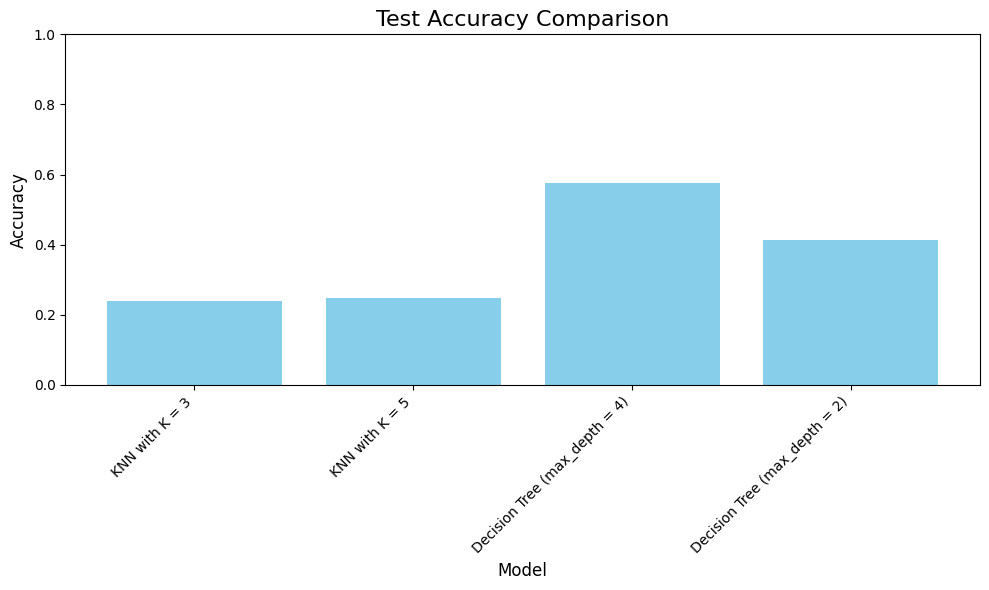

In [ ]:
# Visualization 1: Bar chart for test accuracy
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Test Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

<ipython-input-41-2dcb574d3d66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette="Blues_d")


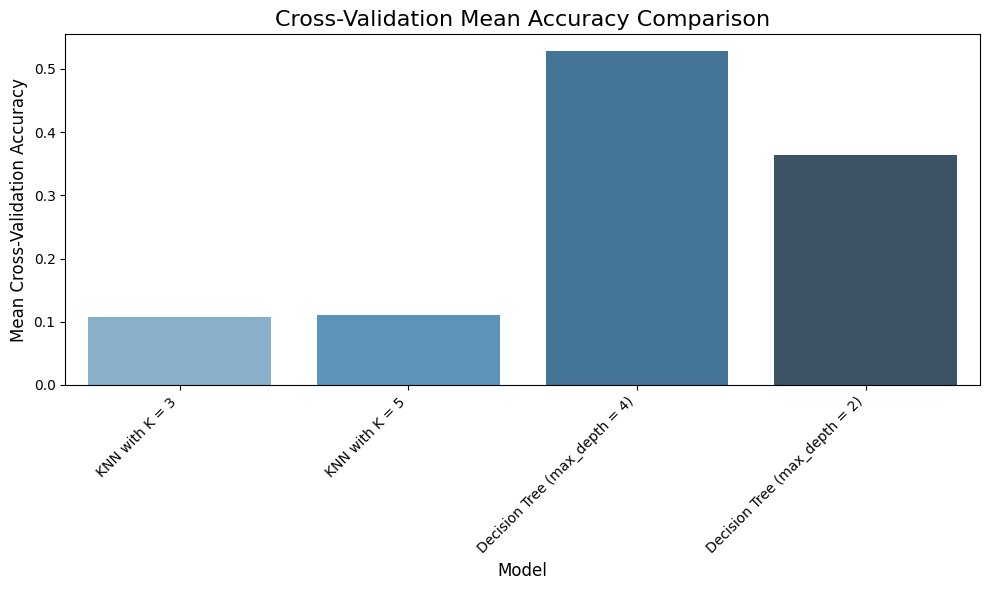

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()), palette="Blues_d")
plt.title('Cross-Validation Mean Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Cross-Validation Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_log, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best CV score
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluate on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Cross-Validation Score: 0.5858
Accuracy on the test set: 0.6850


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
